In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
# Set data path and load training data
file_path = "../data/input"

train_full = pd.read_csv(f'{file_path}/train.csv')

In [8]:
# Drop 'ID' as it is not useful
X_train_full = train_full.drop(['SalePrice','Id'], axis=1)
y_train_full = train_full['SalePrice']

In [9]:
# Create lists for object and numerical columns
object_cols = [col for col in X_train_full.columns if X_train_full[col].dtype == 'object']
numerical_cols = [col for col in X_train_full.columns if X_train_full[col].dtype in ['int64', 'float64']]

print(f'Number of categorical variables: {len(object_cols)}')
print(f'Number of numerical variables: {len(numerical_cols)}')

Number of categorical variables: 43
Number of numerical variables: 36


In [16]:
# Get summary of numerical variables
X_train_full[numerical_cols].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


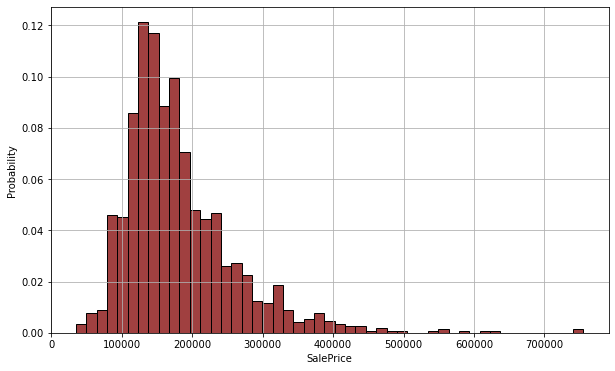

In [12]:
# Create histogram for main dependent variable - SalePrice
fig, axes = plt.subplots(figsize=(10,6))
sns.histplot(data=y_train_full, stat='probability', color='maroon')
axes.grid(True)

Text(0.5, 0, '# of missing values')

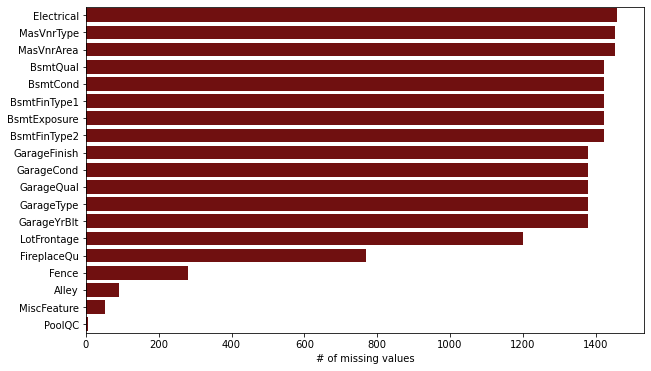

In [24]:
# Visualize missing values 

# Create a series will all the variables that have missing values and their counts
missing_series = X_train_full.count().loc[X_train_full.count() < X_train_full.shape[0]].sort_values(ascending=False)

# Visualize barplot
fig, ax = plt.subplots(1,1, figsize=(10,6))

sns.barplot(x = missing_series.values, y = missing_series.index, color='maroon')
ax.set_xlabel('# of missing values')

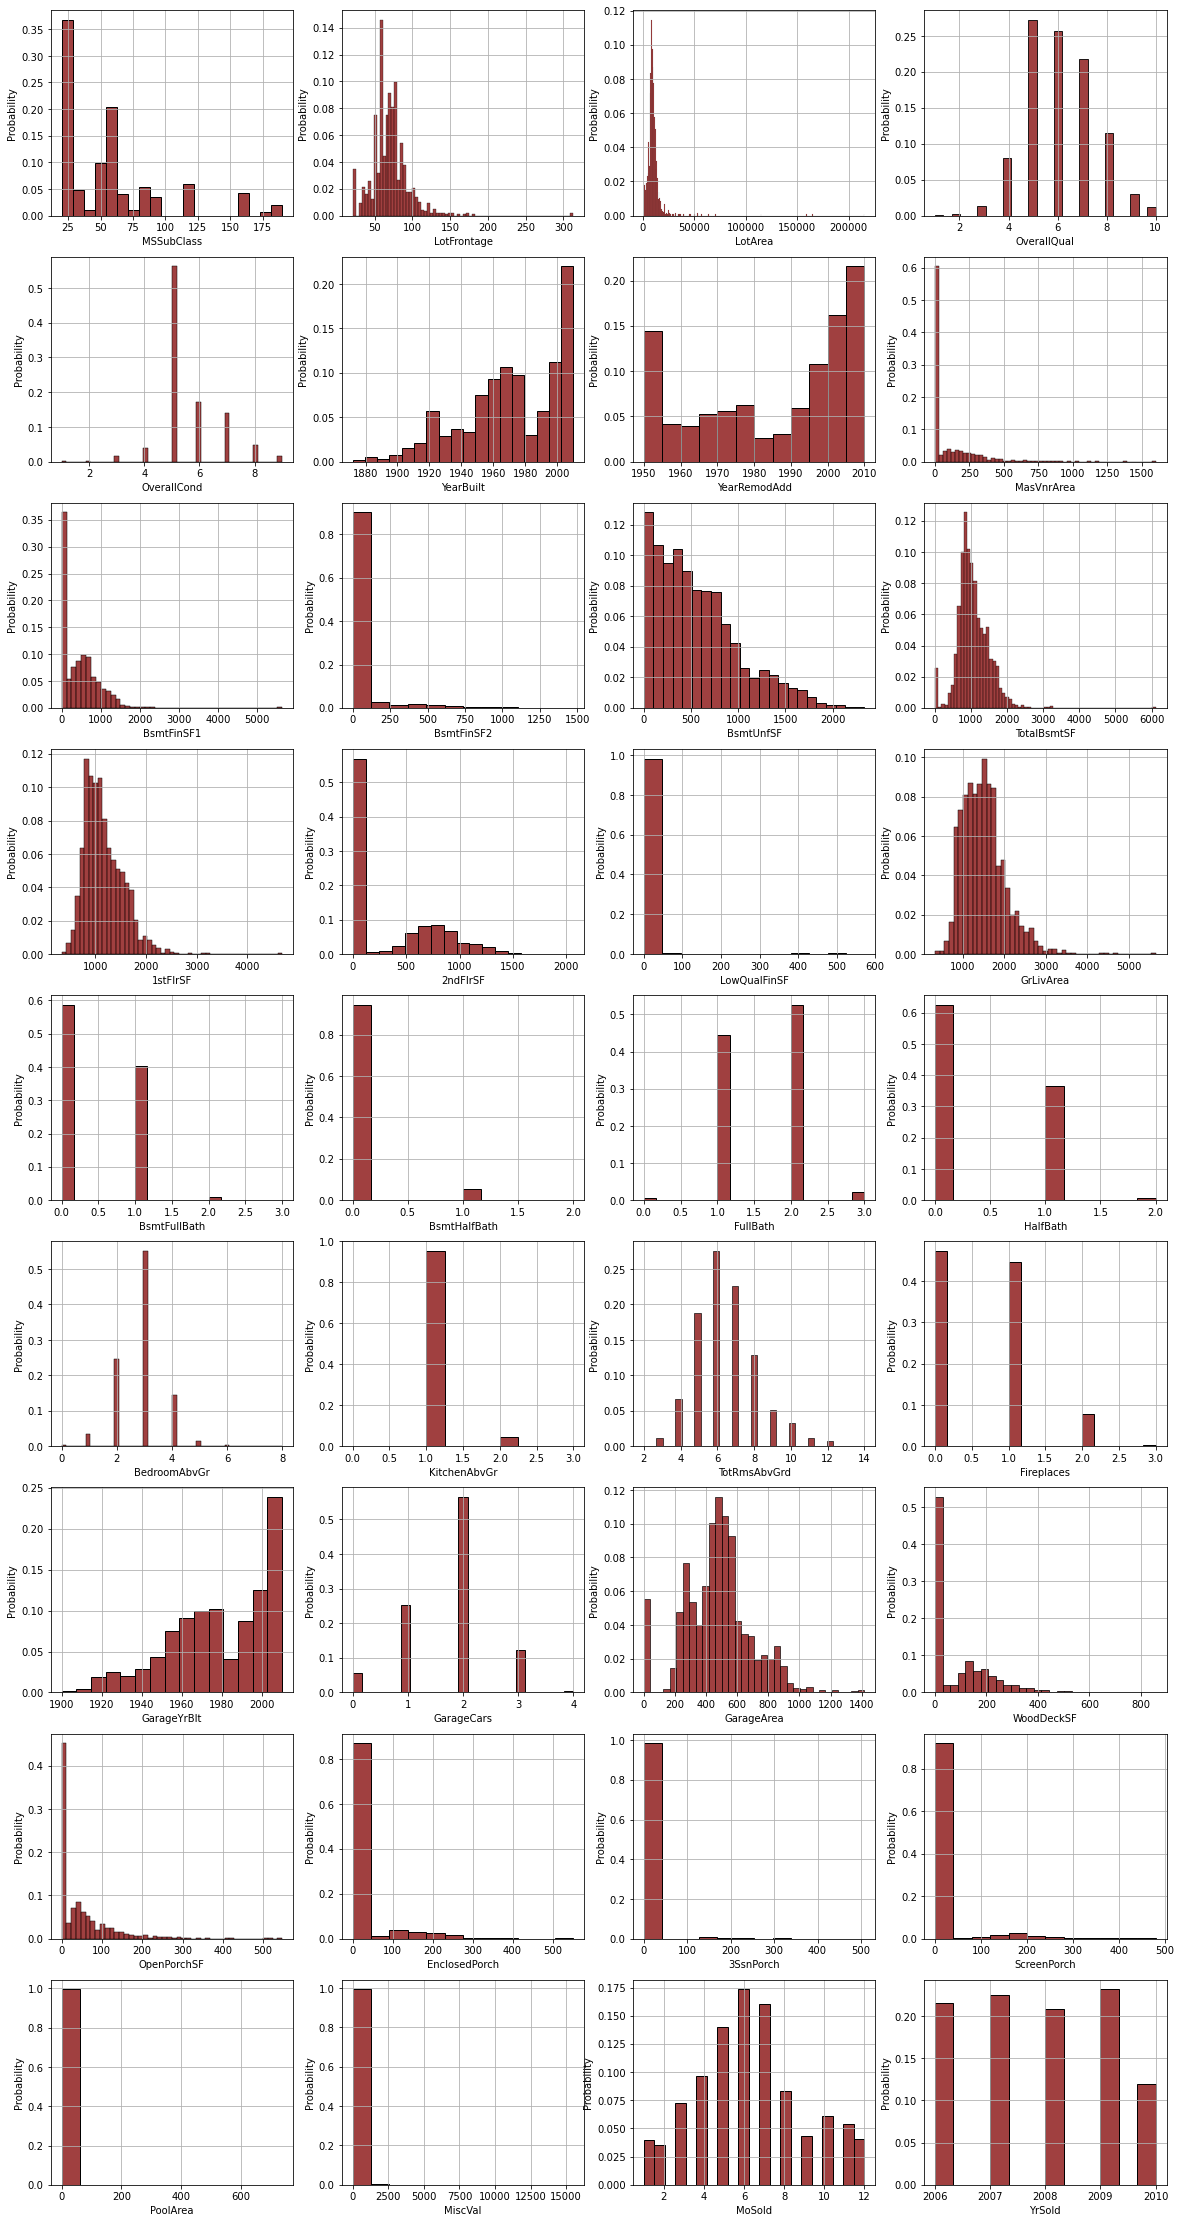

In [10]:
# Create histograms for the distribution of all numerical variables
fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(20,40))

for axis,col in zip(axes.flatten(), numerical_cols):
    sns.histplot(data=X_train_full, x=col, stat='probability', color='maroon', ax=axis)
    axis.grid(True)

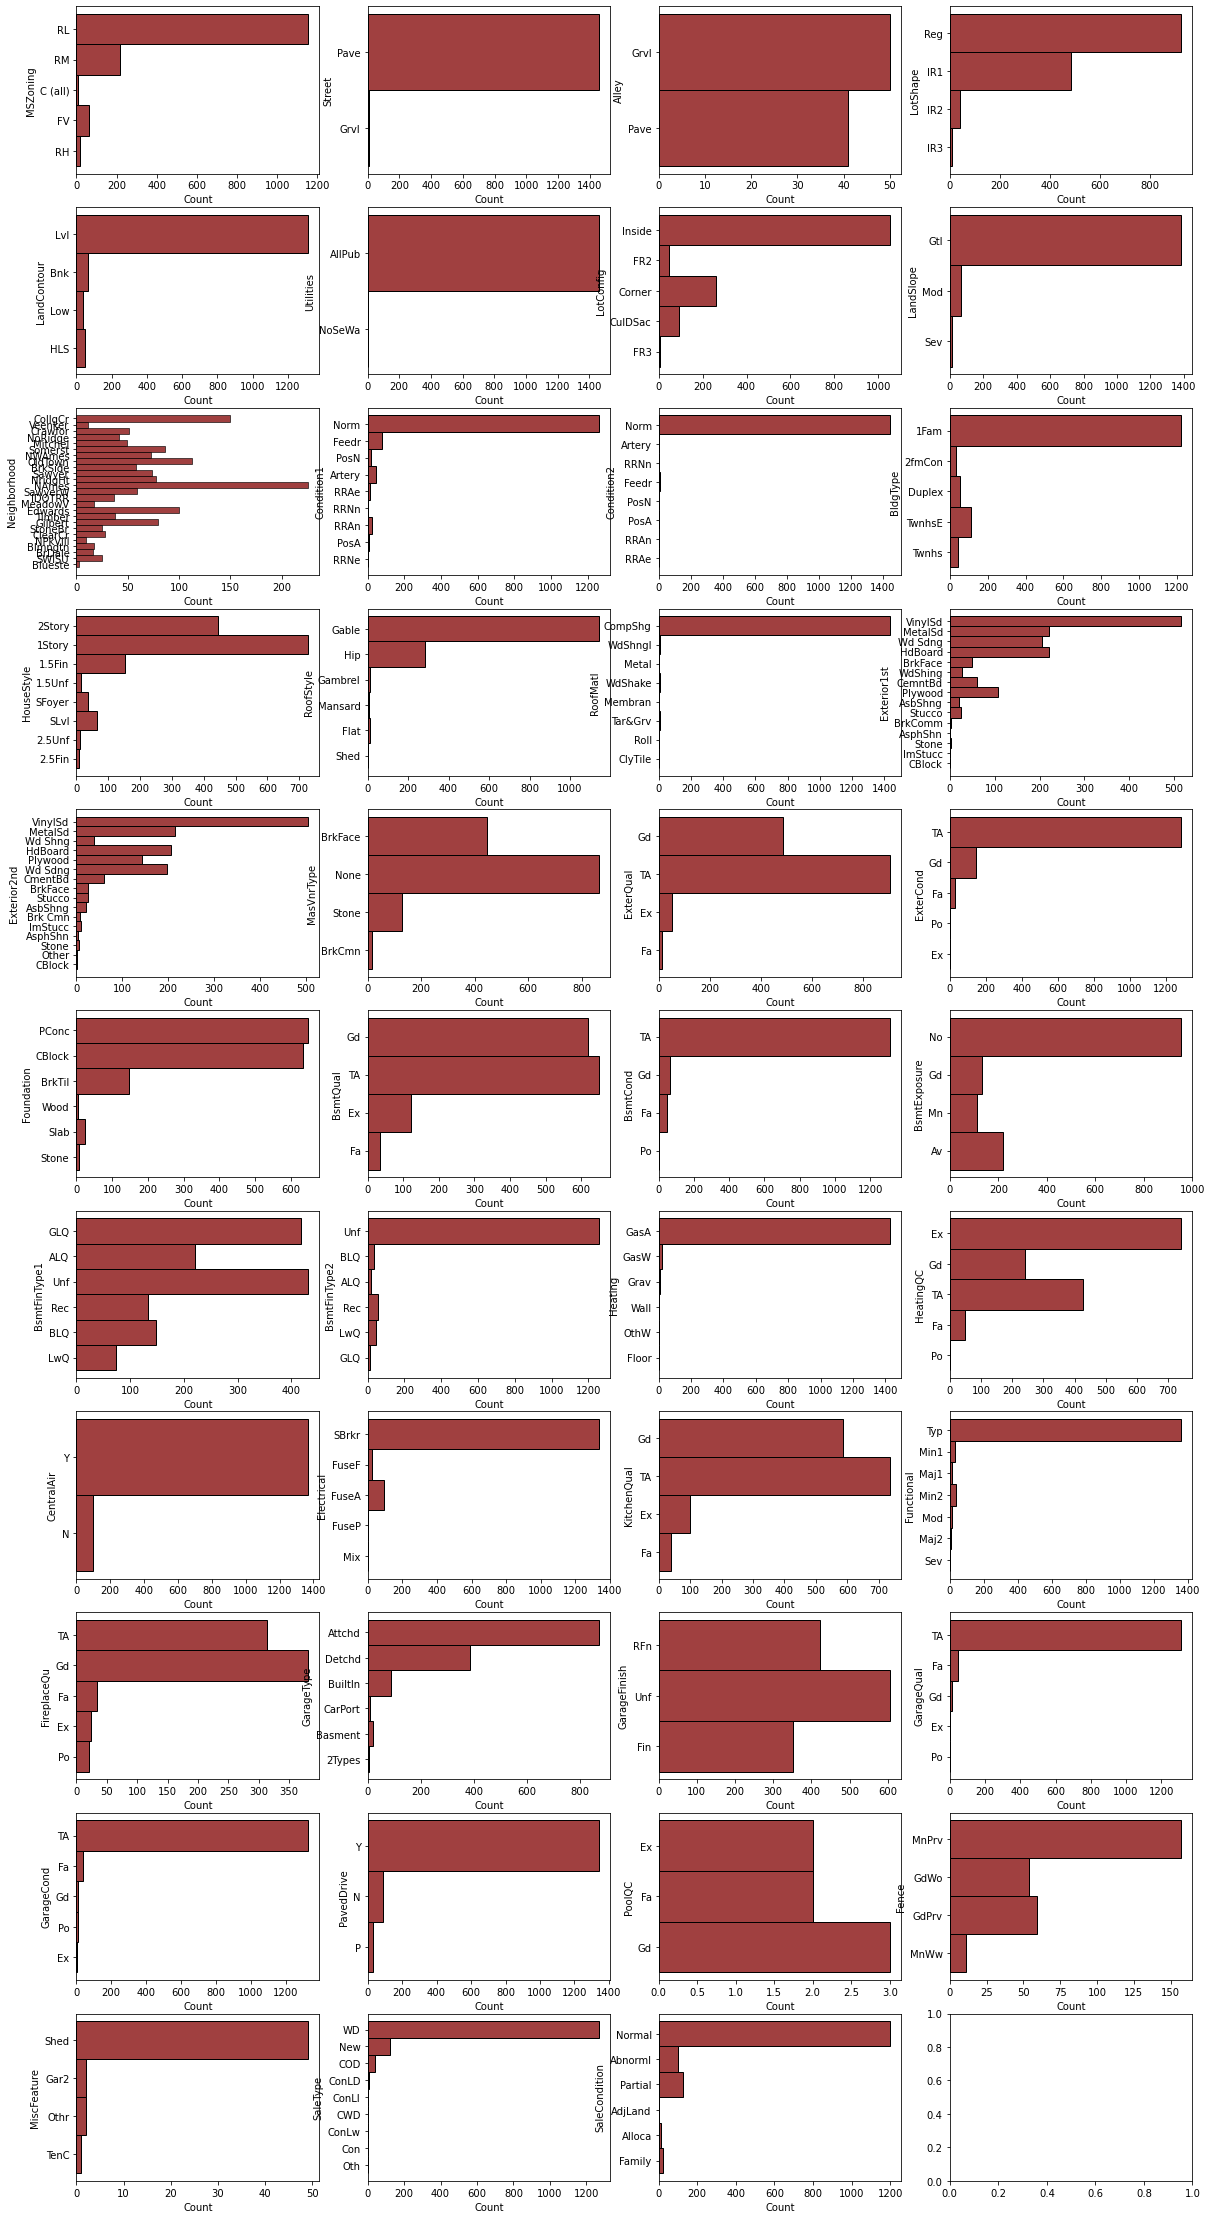

In [14]:
# Create histogram of counts for all categorical variables
fig, axes = plt.subplots(nrows=11, ncols=4, figsize=(20,40))

for axis,col in zip(axes.flatten(), object_cols):
    sns.histplot(data=X_train_full, y=col, stat='count', color='maroon', ax=axis)

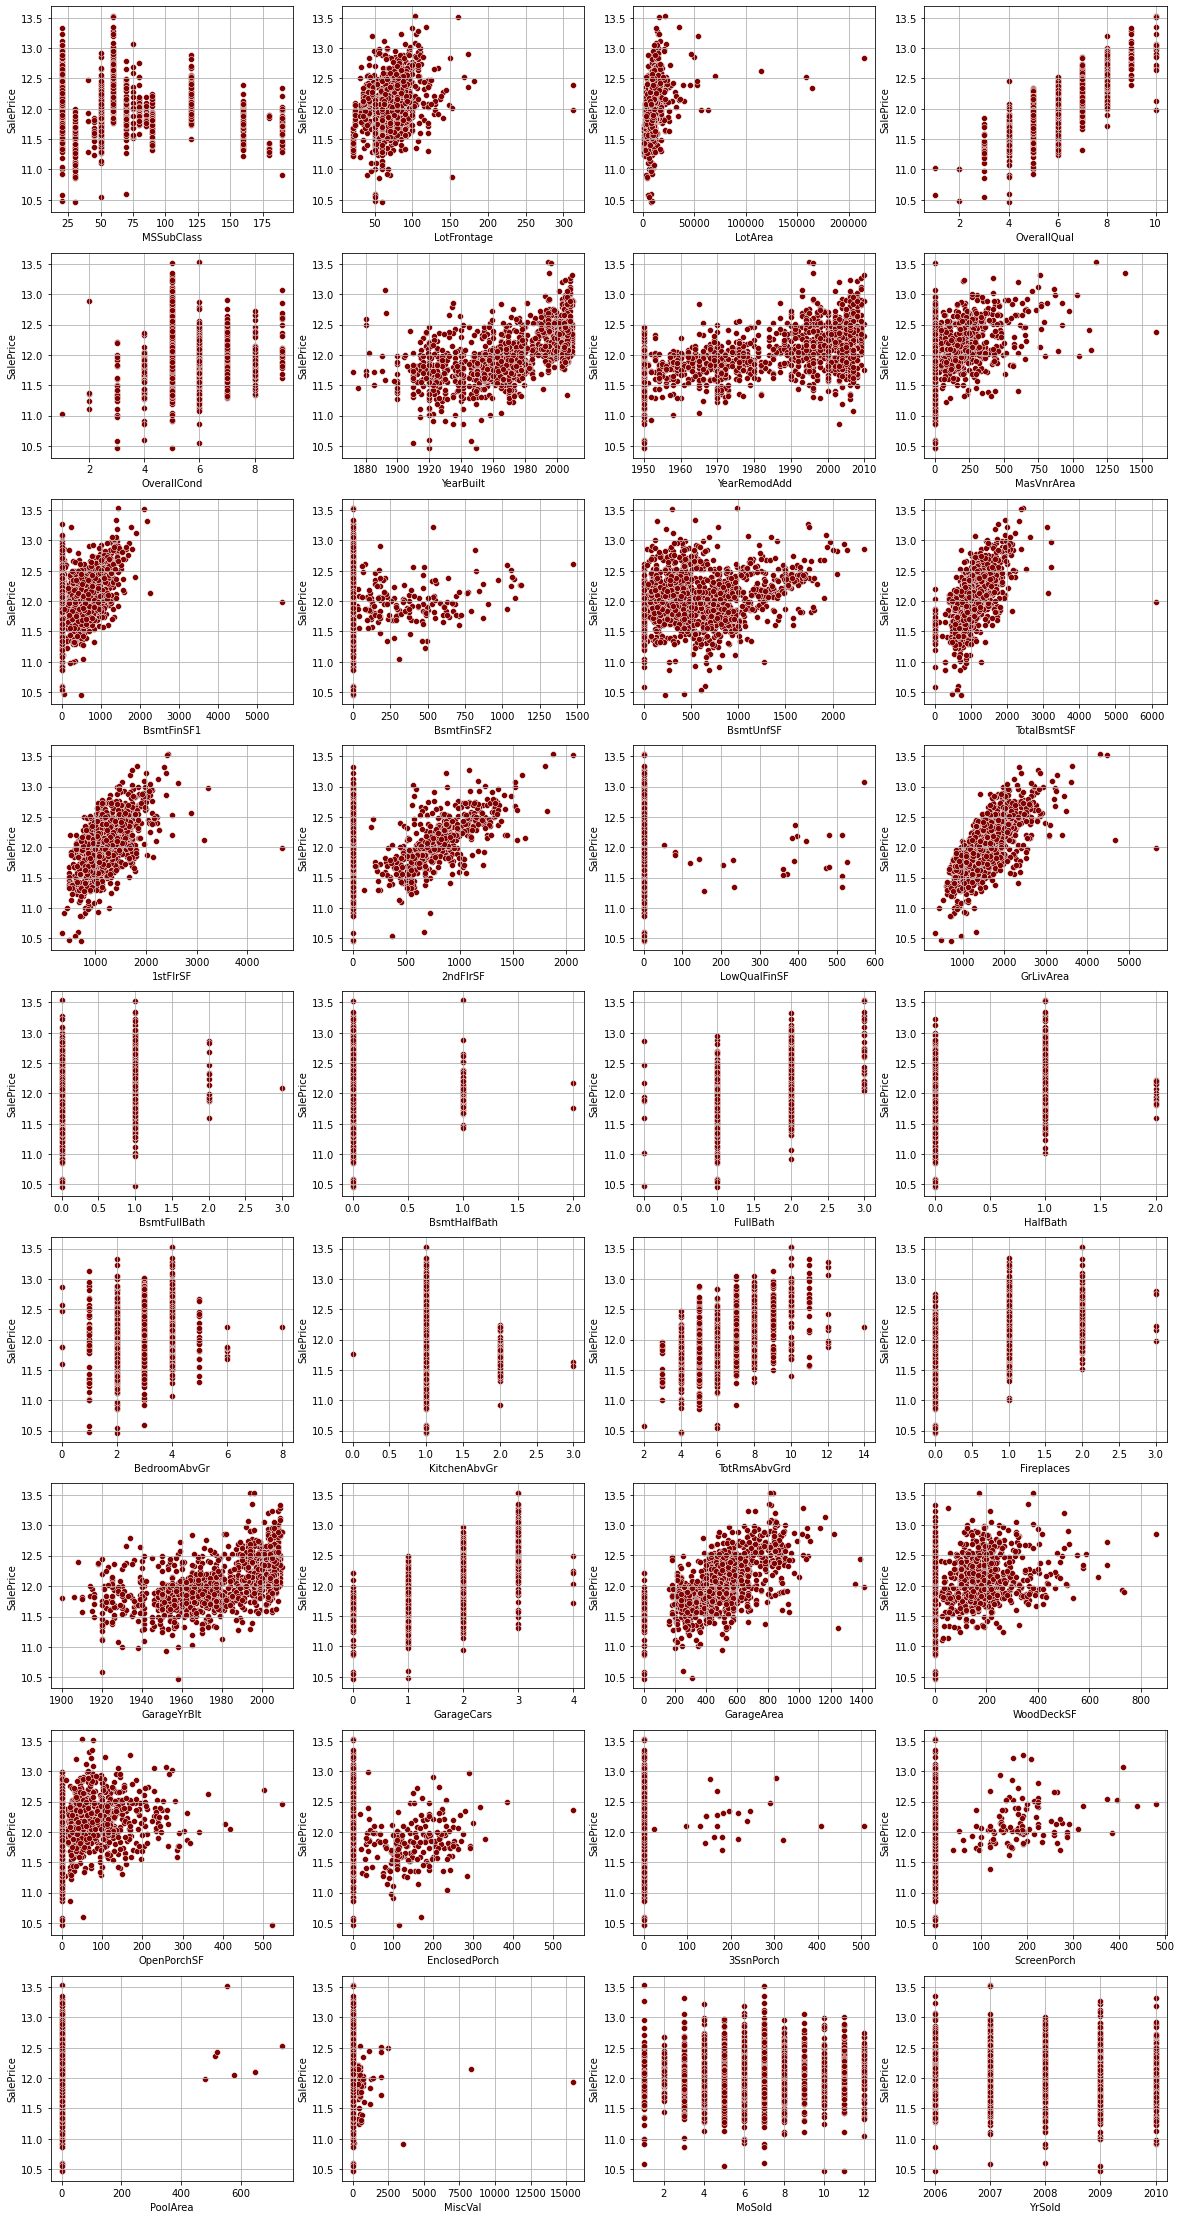

In [17]:
# Create scatter plots for relationships between the numerical variables and the sales price
fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(20,40))

for axis,col in zip(axes.flatten(), numerical_cols):
    sns.scatterplot(x=X_train_full[col], y=np.log(y_train_full), color='maroon', ax=axis)
    axis.grid(True)